Import Wanted Libraies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Import Data Set

In [3]:
data=pd.read_csv(r"B:\swees\Project_Folder\House_Price_Predict\House_Price_Prediction.csv")

Print Sample Data

In [4]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


View The Datasets Summary

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.shape

(4600, 18)

Check The Null Values

In [7]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
data.columns.unique()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

<Axes: >

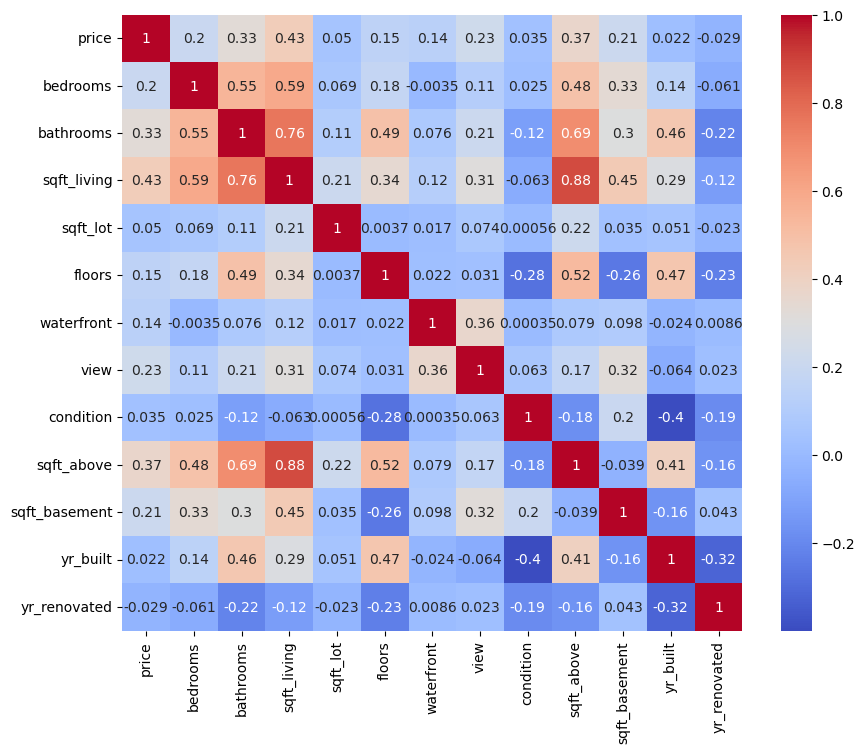

In [11]:
plt.figure(figsize=(10,8))
correlation=data.select_dtypes(include='number').corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [12]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [13]:
remove_column=['street','city','statezip','country','date','yr_renovated']
data.drop(columns=remove_column,inplace=True)

In [14]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object')

In [15]:
import scipy.stats as stats
z_scores=stats.zscore(data)
threshold=3
print("Size before remove outliers:",data.shape)
outlier=data[(z_scores>threshold).any(axis=1)]
data=data[(z_scores<=threshold).all(axis=1)]
print("Size after removing outliers: ",data.shape)

Size before remove outliers: (4600, 12)
Size after removing outliers:  (4244, 12)


In [16]:
outlier.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976
122,2280000.0,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999
164,1135000.0,4.0,2.75,3370,8103,1.0,0,3,3,1970,1400,1970
217,1870000.0,5.0,4.00,4510,15175,2.0,0,0,3,4510,0,1969
227,1800000.0,5.0,5.00,4490,10279,2.0,0,0,3,3930,560,2013
233,1150000.0,4.0,4.00,4460,103382,2.0,0,0,3,4460,0,2001


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)

data_scaled=pd.DataFrame(scaler.transform(data),columns=data.columns)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
x=data.drop('price',axis=1)
y=data['price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
print(f"X-train:{x_train.shape}")
print(f"x-test:{x_test.shape}")

X-train:(3183, 11)
x-test:(1061, 11)


In [22]:
models=[('KNN:',KNeighborsRegressor()),(
        'Decision Tree:',DecisionTreeRegressor()),
        ('Linear Regression:',LinearRegression()),
        ('Random Forest:',RandomForestRegressor())]

In [23]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [24]:
non_numeric=data.select_dtypes(include='object')
non_numeric.columns

Index([], dtype='object')

In [33]:
for name,model in models :
   print(name)
   print()
   
   model.fit(x_train,y_train)
   y_pred=model.predict(x_test)
   print("Mean Square error:",mean_squared_error(y_test,y_pred))
   print("\n")
   print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
   print("\n")
   print("R squared(R2)",r2_score(y_test,y_pred))

KNN:

Mean Square error: 54270710864.73361


Mean absolute error: 155957.7490738805


R squared(R2) 0.2723497581494757
Decision Tree:

Mean Square error: 70657057769.56166


Mean absolute error: 183691.9195089331


R squared(R2) 0.05264507585660172
Linear Regression:

Mean Square error: 41194072741.05764


Mean absolute error: 139590.95600748394


R squared(R2) 0.4476785633497743
Random Forest:

Mean Square error: 44404016760.06556


Mean absolute error: 142709.3695320218


R squared(R2) 0.4046403111407809
